# Let's Grow More(LGMVIP) - "DATA SCIENCE INTERN"

## LGMVIP April-22

### BEGINNER LEVEL TASK

### TASK-3 - Music Recommendation

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
sei = pd.read_csv('song_extra_info.csv')
members = pd.read_csv('members.csv',parse_dates=['registration_init_time','expiration_date'])
songs = pd.read_csv('songs.csv')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
sei

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
2295966,hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=,Deep Breathing,PLL431720793
2295967,N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=,In Hiding,US5UL1519827
2295968,pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=,Il Est Ne Le Divin Enfant,PLL431502294
2295969,QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=,The Exodus Song,DEPZ69316095


In [5]:
def get_codes(isrc):
    if pd.isnull(isrc):
        return np.nan
    else:
        if int(str(isrc)[5:7]) > 17:
            temp =  1900+int(str(isrc)[5:7])
        else:
            temp = 2000+int(isrc[5:7])
        return temp

In [6]:
sei['year'] = sei['isrc'].apply(lambda x: get_codes(x))
sei.sample(10)

,song_id,name,isrc,year
916566,mAWWvZwBeytxnoatCPlSgbryKtI/+cmd/XDgOVoYbdc=,Tryin' To Hide A Fire In The Dark,USCN19300135,1993.0
1865821,BZiBWzlumUeptR0pvGp4N+AqArzeEckJZsq7+YwtO+g=,In Another Land,USA176730203,1967.0
353905,FHB/8EGvDxHFFIJq+9/NUexuVjpH6FDnmxKb8IqpLYU=,This My Life,TCACF1509523,2015.0
1764582,f513IFqOgOKFjRu89+kvWAsowp6wiq15ZJi1O+tsx1Q=,88 Heartbreak,DEZ650518206,2005.0
1125658,mxHiss98W8OUAsSltxsrvTbEgLsQz2WBiWYbJXA6KY4=,Mother Of Dragons,US3M51214818,2012.0
1933593,fOh5vQi7PctuvUsZXJ/aF36SVUUJPKs4jyn1bCExNSg=,Prom Queen,MYUM81606848,2016.0
1127442,Pqmx2ighhCjaLRHpiwYovn5W6B2/ADY02E3WdBZ//p0=,Stereo Zone,DEBL61212963,2012.0
706807,phHCE5mkQTEOanQSEmDCtIQiinbr+uJUkdchZpK9CFY=,Earthsong,QM6N21581105,2015.0
1346266,N/hJJ6utpuAGkJVSOagNNzaeC+hwa4KN3km+B6X/UOY=,We Broke the Sky,GBPS81529153,2015.0
135205,SNl9RXfQtv62C+mJCBL4oMH5f8AFbpiEhLNJFdWsz2A=,茶葉青,HKB120700571,2007.0


In [7]:
members

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,2013-11-11,2017-09-10
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,2014-10-24,2017-05-18
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,2013-08-02,2017-09-08
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,2015-10-20,2017-09-20


In [8]:
members['membership_days'] = members['expiration_date'].subtract(members['registration_init_time']).dt.days.astype(int)
members['registration_year'] = members['registration_init_time'].dt.year
members['expiration_year'] = members['expiration_date'].dt.year
members.drop(columns = ['registration_init_time' , 'expiration_date'] , inplace = True)
members.head()

,msno,city,bd,gender,registered_via,membership_days,registration_year,expiration_year
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2223,2011,2017
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,725,2015,2017
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,457,2016,2017
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,1,2015,2015
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,138,2017,2017


In [9]:
songs

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0


In [10]:
train

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [11]:
test

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
2556785,2556785,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist
2556786,2556786,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,NaN,online-playlist
2556787,2556787,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,NaN,online-playlist
2556788,2556788,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,NaN,online-playlist


In [12]:
# Merging

train = train.merge(songs , on='song_id' , how='left')
train = train.merge(members , on = 'msno' , how='left')
train = train.merge(sei , on = 'song_id' , how='left')
test  = test.merge(songs , on='song_id' , how='left')
test = test.merge(members , on = 'msno' , how = 'left')
test =  test.merge(sei , on = 'song_id' , how = 'left')

In [13]:
train

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,city,bd,gender,registered_via,membership_days,registration_year,expiration_year,name,isrc,year
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,...,1,0,NaN,7,2103,2012,2017,Good Grief,GBUM71602854,2016.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,...,13,24,female,9,2301,2011,2017,Lords of Cardboard,US3C69910183,1999.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,...,13,24,female,9,2301,2011,2017,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,2006.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,...,13,24,female,9,2301,2011,2017,Disco Africa,GBUQH1000063,2010.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,...,1,0,NaN,7,2103,2012,2017,Sleep Without You,QM3E21606003,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1,267958.0,1259,Dr. Dre,Andre R. Young| Melvin Charles Bradford| Shawn...,...,4,26,female,9,4669,2004,2017,Still D.R.E.,USIR19905031,1999.0
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0,227404.0,465,R. City feat. Adam Levine,Theron Thomas| Timothy Thomas| Lukasz Gottwald...,...,1,0,NaN,7,1562,2013,2017,Locked Away,USRC11501369,2015.0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1,258298.0,465,兄弟本色G.U.T.S. (姚中仁、張震嶽、頑童MJ116),姚中仁 MC HotDog 陳昱榕 Ｅ-SO 周文傑 KENZY 林睦淵,...,1,0,NaN,7,1562,2013,2017,FLY OUT,TWA451512031,2015.0
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1,524146.0,2122,Brad Mehldau Trio,NaN,...,5,0,NaN,9,948,2015,2017,Wonderwall,USNO10750721,2007.0


In [14]:
test

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,...,city,bd,gender,registered_via,membership_days,registration_year,expiration_year,name,isrc,year
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,224130.0,458,梁文音 (Rachel Liang),Qi Zheng Zhang,...,1,0,NaN,7,577,2016,2017,愛其實很殘忍,TWUM71400047,2014.0
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,320470.0,465,林俊傑 (JJ Lin),林俊傑,...,1,0,NaN,7,577,2016,2017,她說,TWB671005201,2010.0
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist,315899.0,2022,Yu Takahashi (高橋優),Yu Takahashi,...,1,0,NaN,4,7,2016,2016,subarashiki nichijo,JPWP01070260,2010.0
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,285210.0,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,...,3,30,male,9,3567,2007,2017,Hold Me| Thrill Me| Kiss Me| Kill Me,GBAAN0201228,2002.0
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,197590.0,873,Yoga Mr Sound,Neuromancer,...,3,30,male,9,3567,2007,2017,Om Yoga,ITO101121898,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556785,2556785,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,wJoWzZd7AL+qX9xZWZwRTzGRYg0Lxcl5Pe+9n5hZgAQ=,discover,Online playlist more,online-playlist,247640.0,1609,The Chainsmokers & Coldplay,Andrew Taggart| Christopher Martin| Will Champ...,...,13,41,female,9,2491,2010,2017,Something Just Like This,USQX91700278,2017.0
2556786,2556786,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,KCJ8BlSfRQRgB7EVuzFvg52AhR8m2fT032MzN5ewbEI=,discover,NaN,online-playlist,197067.0,458,郭美美 (Jocie Guo),小路,...,13,24,male,9,1225,2014,2017,一百種孤獨的理由,CNZ171601130,2016.0
2556787,2556787,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,ySDsKJSnhFMESzC9mBhY0hnFEEBWDYx0FOMNcYDLb/A=,discover,NaN,online-playlist,212950.0,458,問樂團 (Guess What),Skot Suyama陶山/Linkin Park,...,13,24,male,9,1225,2014,2017,愛不需要裝乖 / Somewhere I Belong,TWCE31600005,2016.0
2556788,2556788,jvbujcxCExG0CrPShsEmZ6pePcHuRqru2OLEUw85iGk=,WXH8kL8e+0H2jY+s2Y6FpHyyHdaMYV3b6yfDa3FAt9U=,discover,NaN,online-playlist,164414.0,465,陳冠宇 (Kaiel Chen),NaN,...,13,24,male,9,1225,2014,2017,陳冠宇 (Kuan Yu Chen),TWN711700010,2017.0


<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

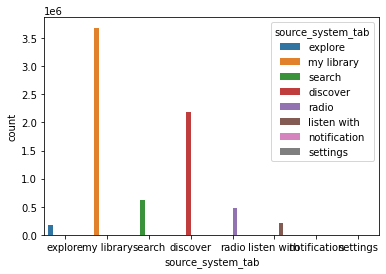

In [15]:
import seaborn as sns
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab'])

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

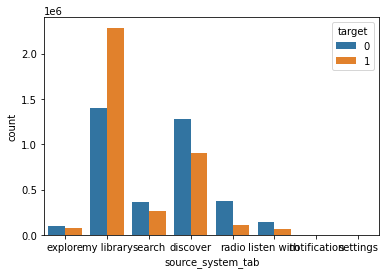

In [16]:
sns.countplot(x = train['source_system_tab'],hue=train['target'])

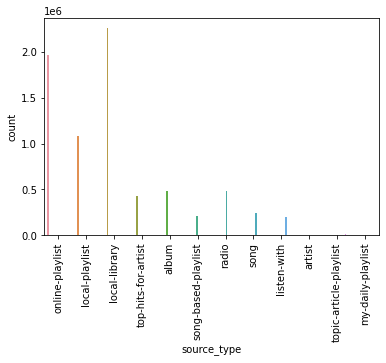

In [17]:
import matplotlib.pyplot as plt
sns.countplot(x = train['source_type'],hue=train['source_type'],data = train,orient='v')
plt.xticks(rotation =90)
plt.legend('',frameon=False)


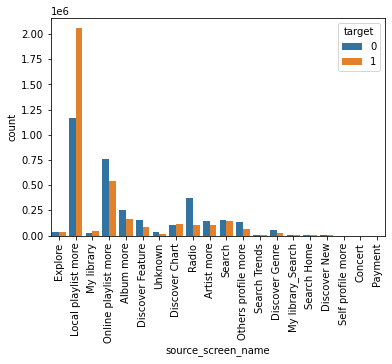

In [18]:
sns.countplot(x = train['source_screen_name'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

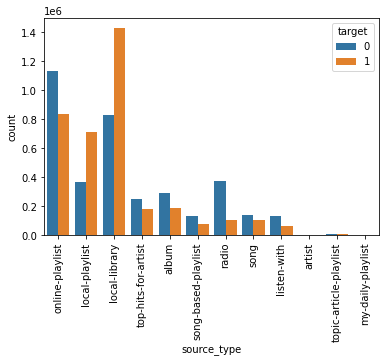

In [19]:
sns.countplot(x = train['source_type'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

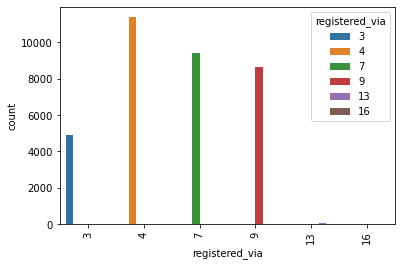

In [20]:
sns.countplot(x = members['registered_via'],hue=members['registered_via'],orient='v')
plt.xticks(rotation =90)
plt.show()

In [21]:
train.isnull().sum()

msno                        0
song_id                     0
source_system_tab       24849
source_screen_name     414804
source_type             21539
target                      0
song_length               114
genre_ids              118455
artist_name               114
composer              1675706
lyricist              3178798
language                  150
city                        0
bd                          0
gender                2961479
registered_via              0
membership_days             0
registration_year           0
expiration_year             0
name                     1457
isrc                   577858
year                   577858
dtype: int64

In [22]:
test.isnull().sum()

id                          0
msno                        0
song_id                     0
source_system_tab        8442
source_screen_name     162883
source_type              7297
song_length                25
genre_ids               42110
artist_name                25
composer               619304
lyricist              1224744
language                   42
city                        0
bd                          0
gender                1052224
registered_via              0
membership_days             0
registration_year           0
expiration_year             0
name                      778
isrc                   196643
year                   196643
dtype: int64

In [23]:
train['song_length'].fillna(train['song_length'].mean() , inplace = True)
train['song_length'] = train['song_length'].astype(np.uint32)

train['language'].fillna(train['language'].mode().values[0] , inplace= True)
train['language'] = train['language'].astype(np.int8)

test['song_length'].fillna(test['song_length'].mean() , inplace = True)
test['song_length'] = test['song_length'].astype(np.uint32)

test['language'].fillna(test['language'].mode().values[0] , inplace= True)
test['language'] = test['language'].astype(np.int8)

In [24]:
def genre_count(genre):
    if genre == 'no_genre_id':
        return 0
    else :
        return genre.count('|') + 1

train['genre_ids'].fillna('no_genre_id' , inplace= True)
train['genre_ids_count'] = train['genre_ids'].apply(lambda x: genre_count(x)).astype(np.int8)

test['genre_ids'].fillna('no_genre_id' , inplace= True)
test['genre_ids_count'] = test['genre_ids'].apply(lambda x: genre_count(x)).astype(np.int8)

In [25]:
def artist_count(art):
    if art=='no_artist_name':
        return 0
    else:
        return art.count('|')+art.count('/') + art.count('//') + art.count(';') + 1

train['artist_name'].fillna('no_artist_name' , inplace = True)
train['artist_count'] = train['artist_name'].apply(lambda x : artist_count(x)).astype(np.int8)
test['artist_name'].fillna('no_artist_name' , inplace = True)
test['artist_count'] = test['artist_name'].apply(lambda x : artist_count(x)).astype(np.int8)

In [26]:
def  count_composer(comp):
    if comp=='no_composer':
        return 0
    else:
        return comp.count('|')+comp.count('/') + comp.count('//') + comp.count(';') + 1

train['composer'].fillna('no_composer',inplace=True)
train['composer_count'] = train['composer'].apply(lambda x: count_composer(x)).astype(np.int8)

test['composer'].fillna('no_composer',inplace=True)
test['composer_count'] = test['composer'].apply(lambda x: count_composer(x)).astype(np.int8)


In [27]:
def  count_lyricist(lyr):
    if lyr=='no_lyricist':
        return 0
    else:
        return lyr.count('|')+lyr.count('/') + lyr.count('//') + lyr.count(';') + 1

train['lyricist'].fillna('no_lyricist',inplace=True)
train['lyricist_count'] = train['lyricist'].apply(lambda x: count_lyricist(x)).astype(np.int8)

test['lyricist'].fillna('no_lyricist',inplace=True)
test['lyricist_count'] = test['lyricist'].apply(lambda x: count_lyricist(x)).astype(np.int8)

In [28]:
dict_count_song_played_train = {k: v for k, v in train['song_id'].value_counts().iteritems()}
dict_count_song_played_test = {k: v for k, v in test['song_id'].value_counts().iteritems()}
def return_number_played(x):
    try:
        return dict_count_song_played_train[x]
    except KeyError:
        try:
            return dict_count_song_played_test[x]
        except KeyError:
            return 0
train['number_of_time_played'] = train['song_id'].apply(lambda x: return_number_played(x))
test['number_of_time_played'] = test['song_id'].apply(lambda x: return_number_played(x))

In [29]:
dict_user_activity = {k:v for k,v in pd.concat([train['msno'] , test['msno']] , axis = 0).value_counts().iteritems()}
def return_user_activity(x):
    try:
        return dict_user_activity[x]
    except KeyError:
        return 0
train['user_activity_msno'] = train['msno'].apply(lambda x: return_user_activity(x))
test['user_activity_msno'] = test['msno'].apply(lambda x: return_user_activity(x))

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoding = ['source_system_tab', 'source_screen_name','source_type','gender']
for f in label_encoding:
                  lb = LabelEncoder()
                  lb.fit(list(train[f].values) + list(test[f].values))
                  train[f] = lb.transform(list(train[f].values))
                  test[f] = lb.transform(list(test[f].values))

In [31]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaling = ['number_of_time_played', 'user_activity_msno','membership_days', 'song_length']
for f in min_max_scaling:
    ms = MinMaxScaler()
    train[f] = ms.fit_transform(train[[f]])
    test[f] = ms.transform(test[[f]])

In [32]:
for col in train.columns:
    if train[col].dtype == object:
        train[col] = train[col].astype('category')
        test[col] = test[col].astype('category')

In [33]:
song_df=train.copy()

In [34]:
song_df.head(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,expiration_year,name,isrc,year,genre_ids_count,artist_count,composer_count,lyricist_count,number_of_time_played,user_activity_msno
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,7,7,1,0.018901,359,Bastille,Dan Smith| Mark Crew,...,2017,Good Grief,GBUM71602854,2016.0,1,1,2,0,0.015316,0.896237
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,3,8,4,1,0.026100,1259,Various Artists,no_composer,...,2017,Lords of Cardboard,US3C69910183,1999.0,1,1,0,0,0.000000,0.092360
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,3,8,4,1,0.020645,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,...,2017,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,2006.0,1,1,1,0,0.000215,0.092360
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,3,8,4,1,0.023420,1019,Soundway,Kwadwo Donkoh,...,2017,Disco Africa,GBUQH1000063,2010.0,1,1,1,0,0.000000,0.092360
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1,7,7,1,0.017180,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,...,2017,Sleep Without You,QM3E21606003,2016.0,1,1,3,0,0.029416,0.896237


In [35]:
song_df["name"]=song_df["name"].values.astype('string')

In [36]:
song_df["artist_name"]=song_df["artist_name"].values.astype('string')

In [37]:
song_df['song'] = song_df['artist_name']+' - '+song_df['name']
song_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,name,isrc,year,genre_ids_count,artist_count,composer_count,lyricist_count,number_of_time_played,user_activity_msno,song
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,7,7,1,0.018901,359,Bastille,Dan Smith| Mark Crew,...,Good Grief,GBUM71602854,2016.0,1,1,2,0,0.015316,0.896237,Bastille - Good Grief
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,3,8,4,1,0.026100,1259,Various Artists,no_composer,...,Lords of Cardboard,US3C69910183,1999.0,1,1,0,0,0.000000,0.092360,Various Artists - Lords of Cardboard
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,3,8,4,1,0.020645,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,...,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,2006.0,1,1,1,0,0.000215,0.092360,Nas - Hip Hop Is Dead(Album Version (Edited))
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,3,8,4,1,0.023420,1019,Soundway,Kwadwo Donkoh,...,Disco Africa,GBUQH1000063,2010.0,1,1,1,0,0.000000,0.092360,Soundway - Disco Africa
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1,7,7,1,0.017180,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,...,Sleep Without You,QM3E21606003,2016.0,1,1,3,0,0.029416,0.896237,Brett Young - Sleep Without You


In [38]:
song_grouped = song_df.groupby(['song']).agg({'number_of_time_played':'count'}).reset_index()
song_grouped.tail()

,song,number_of_time_played
310697,Ｗａｋａｉ Ｐｒｏｊｅｃｔ - 天使にふれたよ！ ～ 『けいおん！』より,1
310698,Ｗａｋａｉ Ｐｒｏｊｅｃｔ - 紅蓮の弓矢 ～ 『進撃の巨人』より,2
310699,Ｗａｋａｉ Ｐｒｏｊｅｃｔ - Ｋｏｍｍ， ｓｕｓｓｅｒ Ｔｏｄ～甘き死よ、来たれ ～ 『新...,2
310700,Ｗａｋａｉ Ｐｒｏｊｅｃｔ - ＯＮＥ ＭＯＲＥ ＴＩＭＥ， ＯＮＥ ＭＯＲＥ ＣＨＡＮＣＥ...,2
310701,ｗ２ｗＧｏ！Ｇｏ！ぱわふる学園 - 激闘！オセロ大作戦！！〜カラオケ〜,1


In [39]:
grouped_sum = song_grouped['number_of_time_played'].sum()
song_grouped['percentage'] = (song_grouped['number_of_time_played'] / grouped_sum ) * 100
song_grouped.sort_values(['number_of_time_played', 'song'], ascending=[0,1])

,song,number_of_time_played,percentage
8525,Alan Walker - Faded,14762,0.200137
178721,The Chainsmokers - Closer,14207,0.192612
236636,周湯豪 (NICKTHEREAL) - 帥到分手,13973,0.189440
236289,周杰倫 (Jay Chou) - 告白氣球,13293,0.180221
61767,Eric 周興哲 - 你，好不好？ (How Have You Been?),13189,0.178811
...,...,...,...
310694,Ｗａｋａｉ Ｐｒｏｊｅｃｔ - ダメダメのうた ～ 『クレヨンしんちゃん』より,1,0.000014
310695,Ｗａｋａｉ Ｐｒｏｊｅｃｔ - プラチナ ～ 『カードキャプチャーさくら』より,1,0.000014
310696,Ｗａｋａｉ Ｐｒｏｊｅｃｔ - 君の知らない物語 ～ 『化物語』より,1,0.000014
310697,Ｗａｋａｉ Ｐｒｏｊｅｃｔ - 天使にふれたよ！ ～ 『けいおん！』より,1,0.000014


In [40]:
# Split the data into train and test split

X_train = train.drop(columns = ['target'] , axis = 1)
Y_train = train['target'].values
X_test = test.drop(columns = ['id'] , axis = 1)
ids = test['id'].values

import lightgbm as lgb
train_set = lgb.Dataset(X_train , Y_train)

In [41]:
params= {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'gbdt',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': 108,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': 10,
        'num_rounds': 200,
        'metric' : 'auc'
    }

%time model_f1 = lgb.train(params, train_set=train_set,  valid_sets=train_set, verbose_eval=5)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.309448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[5]	training's auc: 0.736013
[10]	training's auc: 0.747873
[15]	training's auc: 0.753968
[20]	training's auc: 0.75881
[25]	training's auc: 0.762558
[30]	training's auc: 0.765889
[35]	training's auc: 0.768492
[40]	training's auc: 0.771594
[45]	training's auc: 0.773583
[50]	training's auc: 0.776168
[55]	training's auc: 0.778398
[60]	training's auc: 0.779996
[65]	training's auc: 0.782235
[70]	training's auc: 0.783841
[75]	training's auc: 0.785289
[80]	training's auc: 0.786489
[85]	training's auc: 0.787656
[90]	training's auc: 0.788899
[95]	training's auc: 0.790035
[100]	training's auc: 0.791538
[105]	training's auc: 0.792555
[110]	training's auc: 0.793562
[115]	training's auc: 0.796136
[120]	training's auc: 0.797285
[125]	training's auc: 0.798097
[130]	training's auc: 0.798919
[135]	training's auc: 0.80002
[140]	training's auc

In [42]:
pred_test = model_f1.predict(X_test)
print('Saving Predictions')
sub = pd.DataFrame()
sub['id'] = ids
sub['target'] = pred_test
sub.to_csv('1st_submission.csv' , index = False , float_format ='%.5f' )

Saving Predictions


In [43]:
sub.head()

,id,target
0,0,0.652969
1,1,0.704967
2,2,0.083125
3,3,0.089885
4,4,0.095229


In [44]:
# Popularity Recommendation Engine

def create_popularity_recommendation(train_data, msno, song, n=10):
    #Get a count of user_ids for each unique song as recommendation score
    train_data_grouped = train_data.groupby([song]).agg({msno: 'count'}).reset_index()
    train_data_grouped.rename(columns = {msno: 'score'},inplace=True)
    
    #Sort the songs based upon recommendation score
    train_data_sort = train_data_grouped.sort_values(['score', song], ascending = [0,1])
    
    #Generate a recommendation rank based upon score
    train_data_sort['Rank'] = train_data_sort.score.rank(ascending=0, method='first')
        
    #Get the top n recommendations
    popularity_recommendations = train_data_sort.head(n)
    return popularity_recommendations


In [45]:
recommendations = create_popularity_recommendation(song_df,'msno','song', 15)
display(recommendations)

,song,score,Rank
8525,Alan Walker - Faded,14762,1.0
178721,The Chainsmokers - Closer,14207,2.0
236636,周湯豪 (NICKTHEREAL) - 帥到分手,13973,3.0
236289,周杰倫 (Jay Chou) - 告白氣球,13293,4.0
61767,Eric 周興哲 - 你，好不好？ (How Have You Been?),13189,5.0
270860,田馥甄 (Hebe) - 小幸運 (A little happiness),13079,6.0
288823,謝和弦 (R-chord) - 謝謝妳愛我 (Thanks For Your Love),12004,7.0
299282,陳奕迅 (Eason Chan) - 讓我留在你身邊,11835,8.0
258027,林俊傑 (JJ Lin) - 不為誰而作的歌 (Twilight),11745,9.0
236259,周杰倫 (Jay Chou) - 不該,11521,10.0


In [46]:
display(create_popularity_recommendation(song_df,'msno','artist_name', 10)) 

,artist_name,score,Rank
31960,Various Artists,303616,1.0
35442,周杰倫 (Jay Chou),186776,2.0
34700,五月天 (Mayday),182088,3.0
37131,林俊傑 (JJ Lin),115325,4.0
38026,田馥甄 (Hebe),104946,5.0
33659,aMEI (張惠妹),82799,6.0
39596,陳奕迅 (Eason Chan),76035,7.0
37965,玖壹壹,70445,8.0
10925,G.E.M.鄧紫棋,67296,9.0
2898,BIGBANG,61927,10.0


In [47]:
# Item Similarity Based Recommendation Engine

total_play_count = sum(song_df.number_of_time_played)
play_count = song_df[['song', 'number_of_time_played']].groupby('song').sum().\
             sort_values(by='number_of_time_played',ascending=False).head(5000)

print('5,000 most popular songs represents {:3.2%} of total listen.'.format(float(play_count.sum())/total_play_count))

song_subset = list(play_count.index[:5000])
user_subset = list(song_df.loc[song_df.song.isin(song_subset), 'msno'].unique())
song_df_sub = song_df[song_df.song.isin(song_subset)]
display(song_df_sub.head())

5,000 most popular songs represents 98.69% of total listen.


,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,name,isrc,year,genre_ids_count,artist_count,composer_count,lyricist_count,number_of_time_played,user_activity_msno,song
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,7,7,1,0.018901,359,Bastille,Dan Smith| Mark Crew,...,Good Grief,GBUM71602854,2016.0,1,1,2,0,0.015316,0.896237,Bastille - Good Grief
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1,7,7,1,0.017180,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,...,Sleep Without You,QM3E21606003,2016.0,1,1,3,0,0.029416,0.896237,Brett Young - Sleep Without You
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,7,7,1,0.022710,1259,Desiigner,Sidney Selby| Adnan Khan,...,Panda,USUM71601094,2016.0,1,1,2,0,0.079230,0.896237,Desiigner - Panda
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,3,8,4,1,0.021068,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,...,眼| 鼻| 口 (Eyes| Nose| Lips),TWA531400512,2014.0,1,1,3,2,0.276839,0.092360,BIGBANG TAEYANG - 眼| 鼻| 口 (Eyes| Nose| Lips)
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,1,7,7,1,0.016564,1011,Thomas Rhett,Thomas Rhett| Rhett Akins| Ben Hayslip,...,Star Of The Show,USLXJ1607334,2016.0,1,1,3,0,0.020470,0.896237,Thomas Rhett - Star Of The Show
